In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn import linear_model
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('train .csv')

In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [7]:
smote_df = df.copy()

In [8]:
num_df = smote_df.select_dtypes([np.number])
obj_df = smote_df.select_dtypes(include=['object'])

In [9]:
# def outliers(df, ft):
#     q1 = df[ft].quantile(0.25)
#     q3 = df[ft].quantile(0.75)
#     iqr = q3 - q1
#     ub = q3 + 1.5 * iqr
#     lb = q1 - 1.5 * iqr
#     ls = df.index[(df[ft] > ub) | (df[ft] < lb)]
#     return ls

# def replace_outliers_with_mean(df, ft):
#     q1 = df[ft].quantile(0.25)
#     q3 = df[ft].quantile(0.75)
#     iqr = q3 - q1
#     ub = q3 + 1.5 * iqr
#     lb = q1 - 1.5 * iqr

#     outliers_indices = df.index[(df[ft] >= ub) | (df[ft] <= lb)]


#     df.loc[outliers_indices, ft] = df[ft].mean()

#     return df

# index_ls = []

# for i in num_df.columns:
#     index_ls.extend(outliers(num_df, i))
# print(index_ls)

# for i in num_df.columns:
#     num_df = replace_outliers_with_mean(num_df, i)

In [10]:
from sklearn.calibration import LabelEncoder


le = LabelEncoder()
obj_df = obj_df.apply(le.fit_transform)


In [11]:
result = pd.concat([num_df, obj_df], axis=1)

In [12]:
promoted_df = result['is_promoted']
promoted_df

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [13]:
result = result.drop('is_promoted', axis=1)
result_df = pd.concat([result, promoted_df], axis=1)

In [14]:
result_df = result_df.fillna(result_df.mean())

In [15]:
X = result_df.iloc[:, :-1]
y = result_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [16]:
print(X_train.shape, y_train.shape)

(80172, 13) (80172,)


In [17]:
print(y_train.value_counts())

0    40086
1    40086
Name: is_promoted, dtype: int64


/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


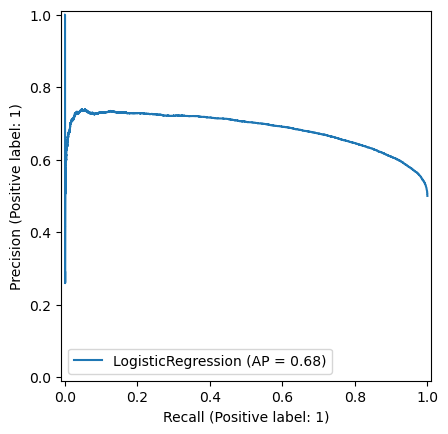

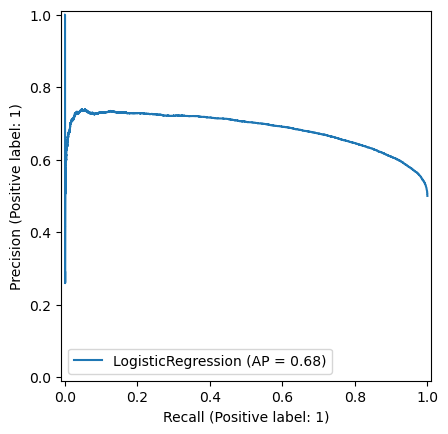

In [18]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import PrecisionRecallDisplay

oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X_train, y_train)

lr = linear_model.LogisticRegression()
lr.fit(X_over, y_over)
y_pred = lr.predict(X_test)
pr = PrecisionRecallDisplay.from_estimator(lr, X_over, y_over)
pr.plot()

0.37666484218208357
0.37666484218208357
-3.9580391436901534
0.6178307842496336


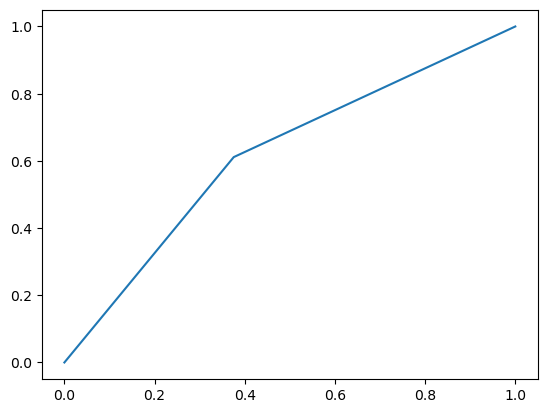

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

#Draw ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()

In [20]:
print(y_over.value_counts())

0    40086
1    40086
Name: is_promoted, dtype: int64


In [21]:
from sklearn.modelselection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_over, y_over)
print(knn_cv.best_params)
print(knncv.best_score)
y_pred = knn_cv.predict(X_test)
print(confusion_matrix(y_test, y_pred))
pr = PrecisionRecallDisplay.from_estimator(knn_cv, X_over, y_over)
pr.plot()

ModuleNotFoundError: No module named 'sklearn.modelselection'